 ## Statistics_Correlation
 
    최초 작성일 : 2020/03/06
    작성자 : 조예슬 
 
    < 작성 내용 >
    
        - 상관분석
        
        - 분석한 것 그래프로 나타내기

### 상관분석

    두 변수간에 어떤 선형적 관계를 가지는지 분석하는 기법으로 상관계수를 이용하여 측정
    
    - 상관계수 R
     : X와 Y가 함께 변하는 정도 / X와 Y가 각각 변하는 정도
     : r = +1 : X, Y가 완전히 동일
     : r = -1 : X, Y가 반대방향으로 완전히 동일
     : r = 0 : X, Y 선형의 상관관계가 아니다
             : 두 변수가 곡선관계일 수 있다

     : 분석에서 매우 높은 상관계수가 나왔다면, 두 변량사이의 상관정도를 결정짓기 전에 데이터 내에 bias가 있는지 반드시 확인해볼것
     
#### 상관 계수 종류

    - Pearson
     : 상관 분석에서 기본적으로 사용되는 피어슨 상관계수
     : 연속형 변수의 상관관계 측정 
     : 모수 검정(parametric test)
     : ex) 신장, 몸무게
     
    - Kendall
     : 켄달 상관계수(τ, tau)
     : 변수값 대신 순위로 바꿔서 이용하는 상관계수
     : 샘플사이즈가 적거나, 데이터의 동률이 많을 때 유용
     : 비모수 검정(non-parametric test)
     : ex) 학교등급, 졸업학위 level
     
    - Spearman
     : 스피어만 상관 계수(ρ, rho)
     : 변수값 대신 순위로 바꿔서 이용하는 상관계수
     : 데이터 내 편차와 에러에 민감하며, 일반적으로 켄달 상관계수보다 높은 값을 가짐
     : 비모수 검정(non-parametric test)
     : ex) 학교등급, 졸업학위 level
             

    But, 상관분석을 보며 원인-결과로 설명하는 것은 옳지 않다
        A와 B가 positive correlation이란 사실은
        A가 증가하는게 원인이 되서 B가 증가하는지,
        B가 증가하는게 원인이 되서 A가 증가하는지, 알 수 없다.
    
    따라서, 원인-결과 분석을 하고 싶다면, 
            Y(결과) = aX(원인) + b 의 회귀분석을 수행할 것!!!   
     

< 출처 >

https://bioinformaticsandme.tistory.com/58?category=808983

In [2]:
# install.packages("UsingR")
library(UsingR)

Warning message:
"package 'UsingR' was built under R version 3.6.3"Loading required package: MASS
Loading required package: HistData
Warning message:
"package 'HistData' was built under R version 3.6.3"Loading required package: Hmisc
Warning message:
"package 'Hmisc' was built under R version 3.6.3"Loading required package: lattice
Loading required package: survival
Warning message:
"package 'survival' was built under R version 3.6.3"Loading required package: Formula
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.2"
Attaching package: 'Hmisc'

The following objects are masked from 'package:base':

    format.pval, units


Attaching package: 'UsingR'

The following object is masked from 'package:survival':

    cancer



### 예시1. 부모키가 자식키에 영향을 미치는지 여부 알아보기

    귀무가설 : 부모키는 자식키에 영향을 미치지 않는다
    대립가설 : 부모키는 자식키에 영향을 미친다

'data.frame':	928 obs. of  2 variables:
 $ child : num  61.7 61.7 61.7 61.7 61.7 62.2 62.2 62.2 62.2 62.2 ...
 $ parent: num  70.5 68.5 65.5 64.5 64 67.5 67.5 67.5 66.5 66.5 ...


child,parent
61.7,70.5
61.7,68.5
61.7,65.5
61.7,64.5
61.7,64.0
62.2,67.5


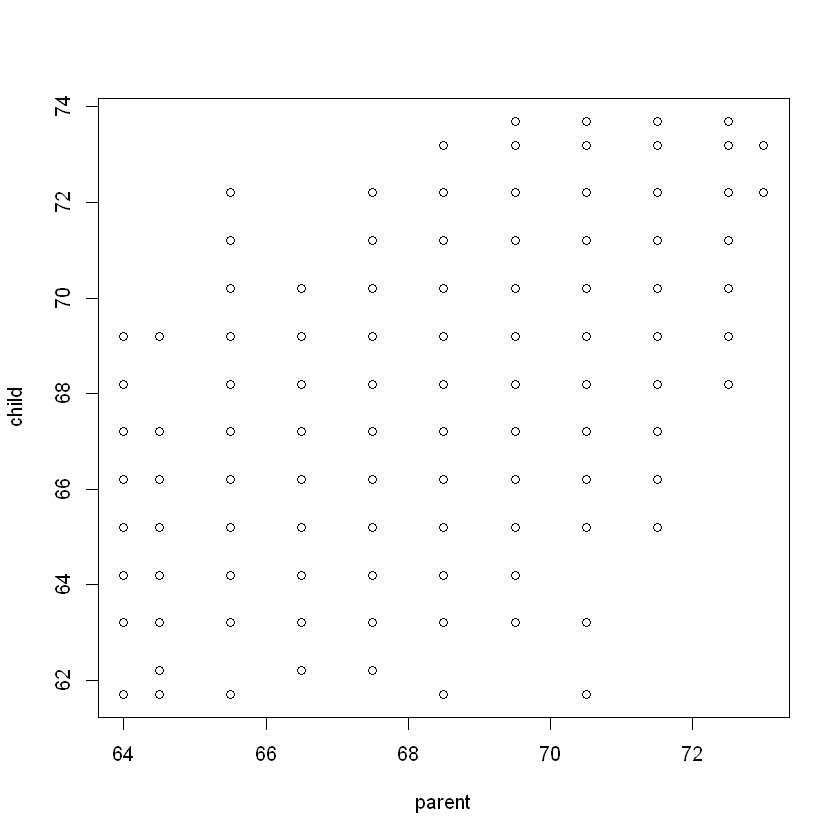

In [12]:
# 데이터 준비

str(galton)
head(galton)

# 그래프를 그려서 관계 먼저 확인해보장
# child 가 결과, parent 원인
plot(child ~ parent, data=galton)
# 오.. 그래프 뭐야.....
# 약간 양의 상관관계인 것 같다

In [13]:
# 회귀분석전 관계가 있는 상관관계 먼저 파악

# child, parent 값 모두 연속 변수
# 연속변수 : 변수의 각 값 사이에 무수히 많은 또 다른 값들이 존재하는 경우를 의미
#          : ex) 사람의 키, 몸무게, 나이, 한 가구의 소득

cor(galton$child, galton$parent)
# cor 안에 method 부분에 함수 지정 가능, 따로 지정하지 않으면 pearson 함수 들어감
# 결과 0.45.. 어느 정도 관계가 있다는 것.....

cor.test(galton$child, galton$parent)
# test 넣어주면 더 디테일하게 볼수있음
# p-value < 2.2e-16  0.05보다 작음 / 대립가설 성립 / 아주 의미있다
# 관계있음을 알수있다 = 부모키가 크면 자식키도 크다 

# 여기까지 상관계수 기본 끝
# 주의할점 0.45의 값은 기울기가 아니다!!
# 최고값이 1일때 이 분포의 상관정도를 나타낸 값이다 

[1] 0.4587624


	Pearson's product-moment correlation

data:  galton$child and galton$parent
t = 15.711, df = 926, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4064067 0.5081153
sample estimates:
      cor 
0.4587624 


In [14]:
# 이 분포를 대표하는 선을 그리고 싶을때
# 이 분포를 대표하는 선형 모델을 만들자

out <- lm(child ~ parent, data=galton) # lm : linear model 선을 그려주는 함수
summary(out) 
# intercept : 23.94153 (y 절편) 
# parent : 0.64629 (기울기) 
# y = 23.94153 + 0.64629*X 에 해당하는 직선이 이 분포를 가장 잘 대변함


Call:
lm(formula = child ~ parent, data = galton)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.8050 -1.3661  0.0487  1.6339  5.9264 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 23.94153    2.81088   8.517   <2e-16 ***
parent       0.64629    0.04114  15.711   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.239 on 926 degrees of freedom
Multiple R-squared:  0.2105,	Adjusted R-squared:  0.2096 
F-statistic: 246.8 on 1 and 926 DF,  p-value: < 2.2e-16


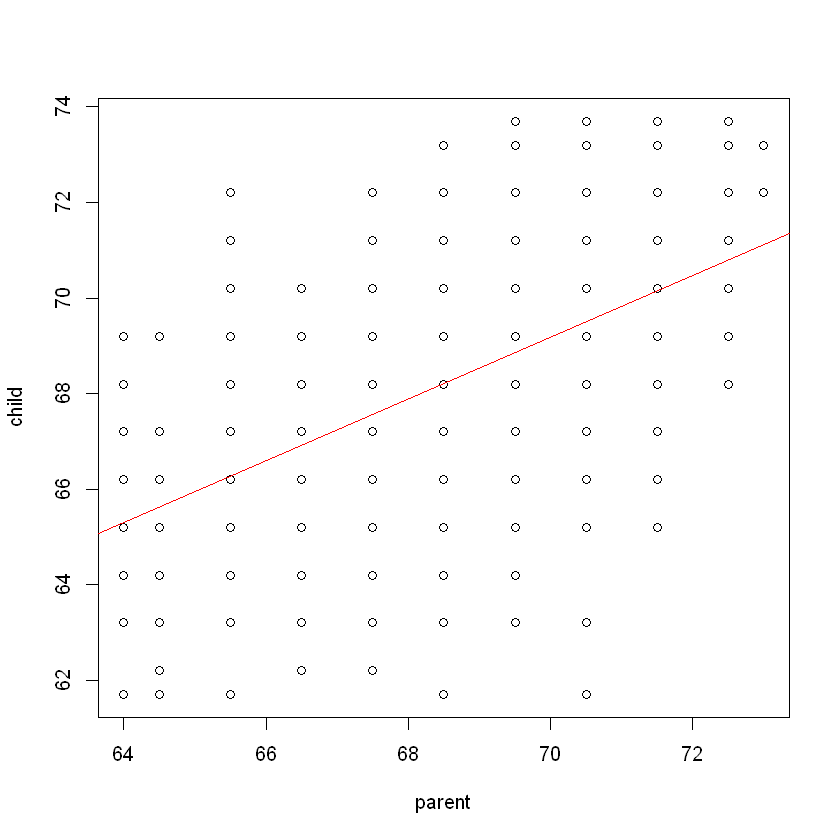

In [21]:
# 이 직선을 분포 위에 올리기 위해선 abline() 함수 활용

plot(child ~ parent, data=galton)
abline(out, col="red") 
# 키를 반올림해서 잰것이기 때문에
# 값들의 분포가 아주 동일하게 떨어져있는것을 볼 수 있다
# 점 안에 여러 값들이 들어가 있다(=누적되어있다)
# 누적되어 있는 점들을 직관적으로 들어내주자

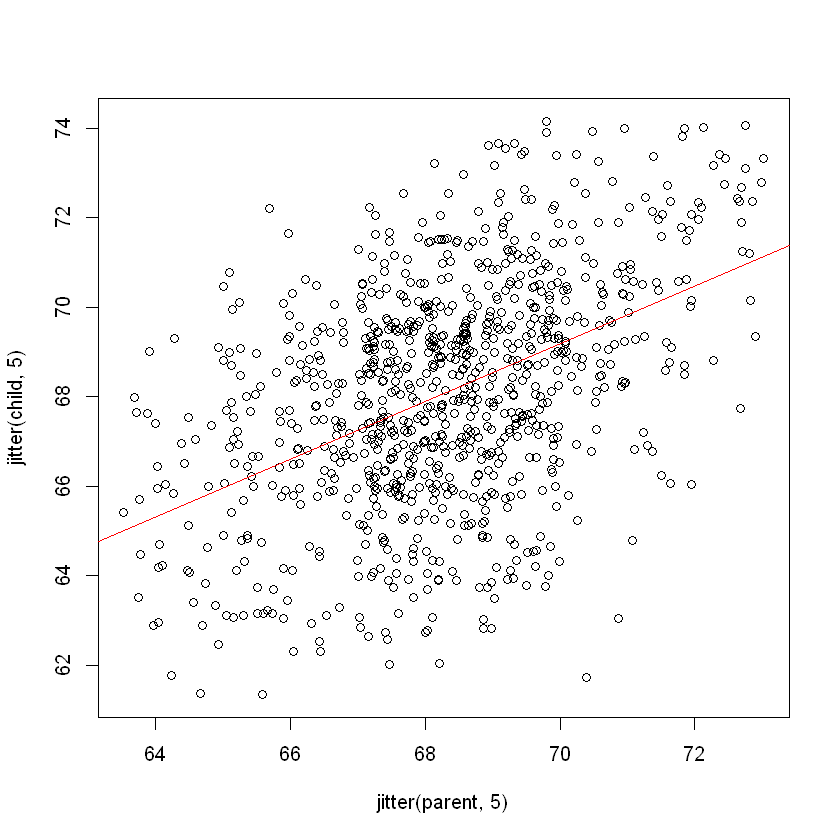

In [20]:
# 누적값들 직관적으로 들어내주기 : jitter()함수 이용하여 분산시키자

plot(jitter(child, 5) ~ jitter(parent, 5), data=galton)

# 그냥 5라는 정도로 옵션주기
# 점들이 일정한 자리에 있지않고 흩으러져서 놓여진걸 볼 수 있다
# 앞에서 보여진 데이터 보다 설득력있게 이야기 전개 가능
# 이 위에 선형 모델 올려주기
abline(out, col='red')

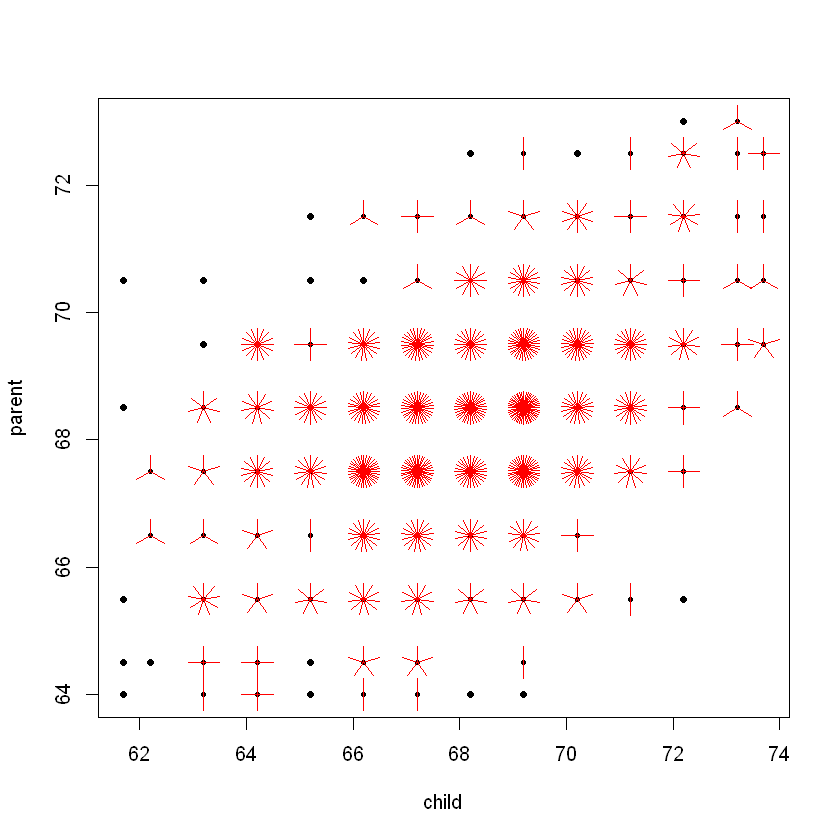

In [22]:
# 더 이쁘게 그려보자...

sunflowerplot(galton) 
# 겹쳐져있는 개수 알수있음 
# 안쪽에 많은 데이터가 겹쳐있고, 바깥쪽으로 갈수록 데이터가 적은 것을 볼 수 있다

# 하지만 점들이 너무 많아진다면
# 이것들도 누적되어서 보일 수 있다

In [31]:
# 큰 데이터 준비
# install.packages("SwissAir")
library(SwissAir)

# data("AirQual")
str(AirQual)
head(AirQual)

# 그냥,, 실습하기 좋은 데이터로 만들기
Ox <- AirQual[,c("ad.O3", "lu.O3", "sz.O3")] + 
    AirQual[, c("ad.NOx", "lu.NOx", "sz.NOx")] -
    AirQual[, c("ad.NO", "lu.NO", "sz.NO")]

names(Ox) <- c("ad", "lu", "sz")

Ox

ad,lu,sz
14.4,22.9,16.4
14.0,22.5,16.1
13.2,22.2,15.3
13.2,22.3,15.5
14.7,22.5,15.4
15.5,22.2,15.3
15.6,21.1,15.3
14.9,21.7,17.1
15.1,21.8,18.8
15.2,22.4,19.8


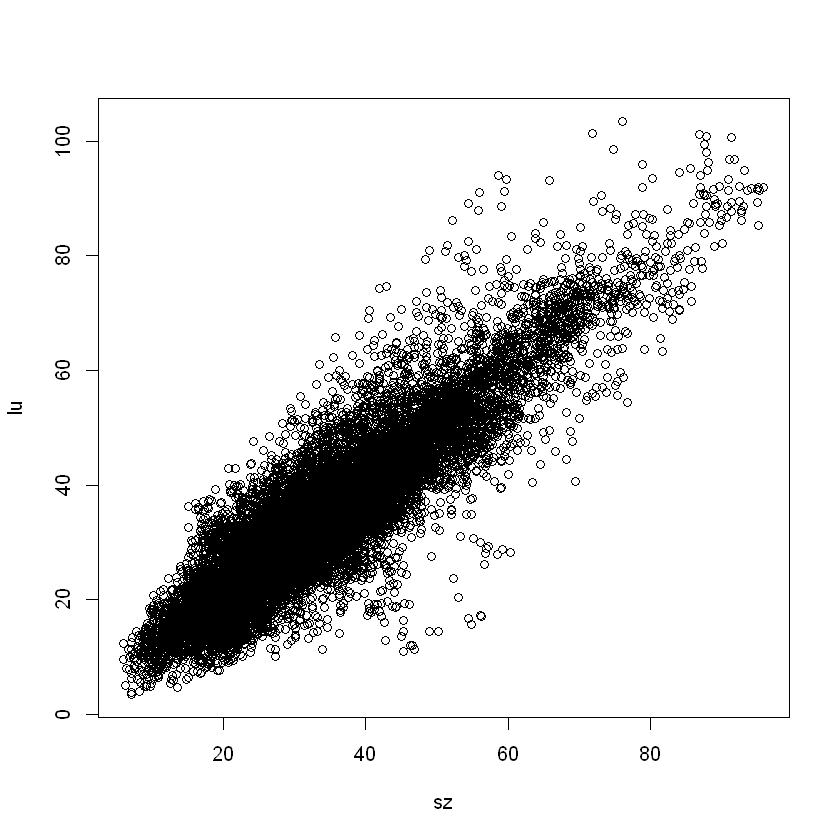

In [32]:
# 그래프
plot(lu ~ sz, data=Ox)
# 이렇게 많은 데이터 다뤄볼것이야..
# 겹쳐진 부분이 너무 많은 데이터를 어떻게 하면 더 직관적이게 보여줄수있는가?
# 를 알아보자
# 앞쪽의 농도가 뒷쪽의 농도보다 더 짙다고 추정할 수 있다
# 농도나 컬러를 이용해서 보게 됨

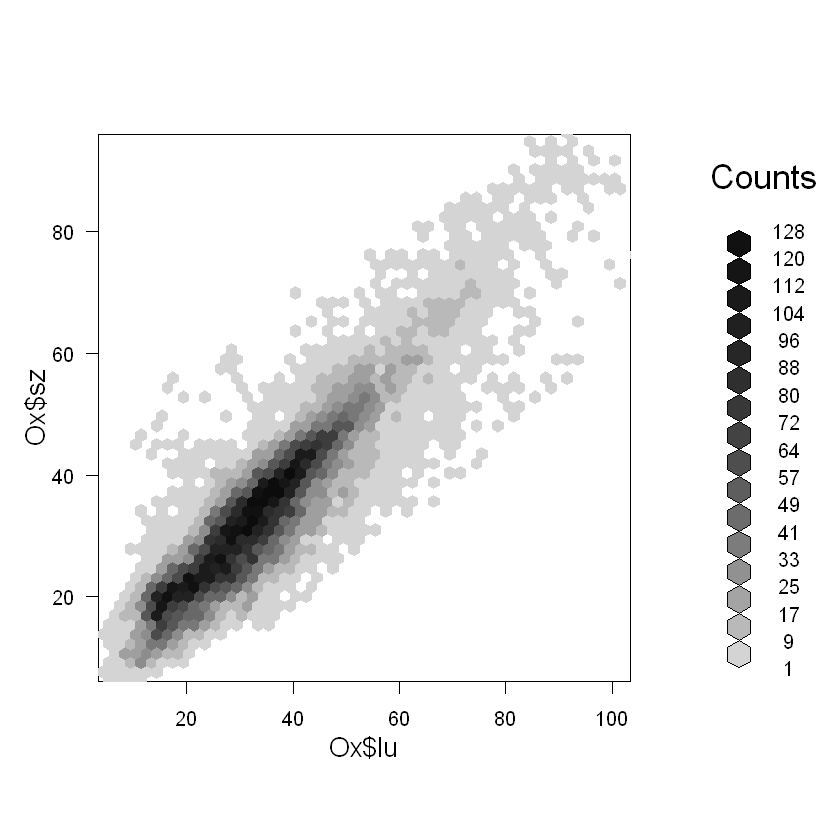

In [36]:
# 농도나 컬러를 이용해서 보게 됨
# install.packages("hexbin")
library(hexbin)

bin <- hexbin(Ox$lu, Ox$sz, xbins = 50)
# bin을 plot에 올리기
plot(bin)
# 농도를 이용해서 값들이 보이는것을 볼 수 있다
# 색의 짙은 정도를 자동적으로 보여준당
# 육각형 도형들을 이용해서 표현했는데

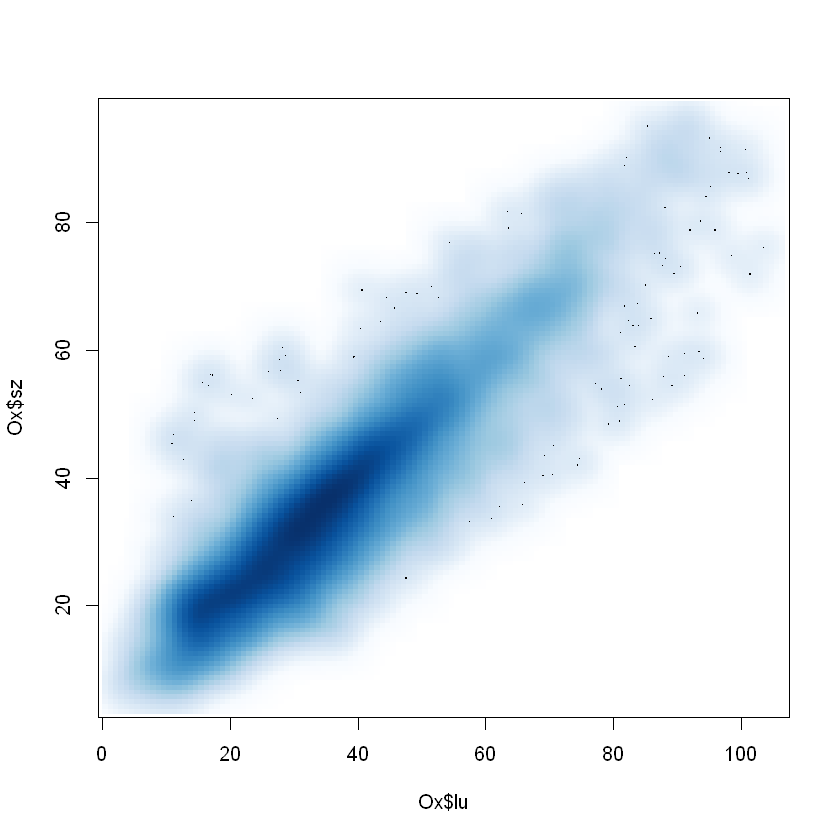

In [37]:
# 컬러를 이용해서 표현해보자

smoothScatter(Ox$lu, Ox$sz)
# 더 확연하게 확인 가능

In [39]:
# install.packages("IDPmisc")
library(IDPmisc)

Warning message:
"package 'IDPmisc' was built under R version 3.6.3"
Attaching package: 'IDPmisc'

The following object is masked from 'package:Hmisc':

    zoom



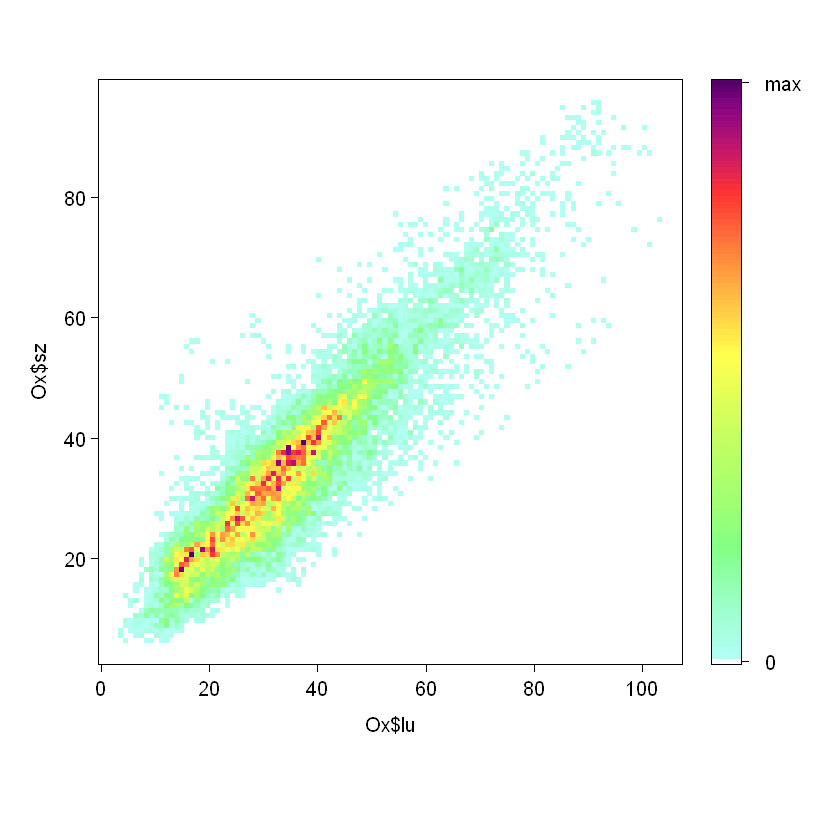

In [40]:
# 온도 색으로 밀도 표현
iplot(Ox$lu, Ox$sz)

< 출처 >

https://jinmedi.tistory.com/413?category=358093

### 예시2. 인구증가율
    pop_growth : 인구증가율
    elderly_rate : 65세 이상 노인인구 비율
    finance : 재정 자립도
    cultural_center : 인구 10만명당 문화기반 시설수

In [42]:
# 데이터 준비

mydata <- read.csv("C:/Users/cho ye seul/Documents/예슬/Acorn/rwork/StatProject/data/cor.csv")
str(mydata) # 7개의 변수 157개 데이터
head(mydata)

'data.frame':	157 obs. of  7 variables:
 $ 군별           : Factor w/ 157 levels "강원 강릉시",..: 31 30 43 35 29 22 46 28 33 20 ...
 $ pop_growth     : num  1.06 -0.26 0.69 -0.47 -0.64 -0.88 2.67 0.52 -1.05 2.14 ...
 $ birth_rate     : num  1.29 1.16 1.1 1.18 1.07 ...
 $ elderly_rate   : num  8.71 11.26 12.63 10.32 10.13 ...
 $ finance        : num  0.729 0.768 0.606 0.721 0.662 0.691 0.636 0.575 0.666 0.659 ...
 $ cultural_center: num  2.79 2.16 1.38 2.34 2.94 2.32 2.61 4.08 3.44 3.02 ...
 $ dummy          : int  1 1 1 1 1 1 1 1 1 1 ...


군별,pop_growth,birth_rate,elderly_rate,finance,cultural_center,dummy
경기 수원시,1.06,1.292,8.71,0.729,2.79,1
경기 성남시,-0.26,1.159,11.26,0.768,2.16,1
경기 의정부시,0.69,1.104,12.63,0.606,1.38,1
경기 안양시,-0.47,1.177,10.32,0.721,2.34,1
경기 부천시,-0.64,1.072,10.13,0.662,2.94,1
경기 광명시,-0.88,1.235,10.77,0.691,2.32,1


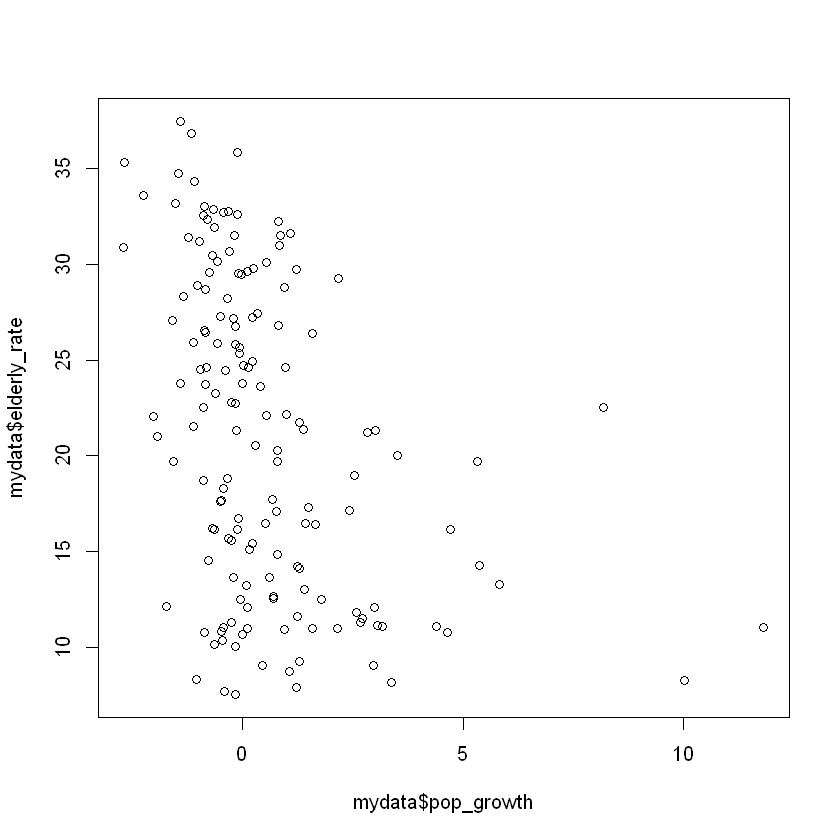

In [44]:
# 그래프부터 살펴보기

plot(mydata$pop_growth, mydata$elderly_rate)
# 왼쪽으로 굉장히 치우쳐져 있는듯 하다

In [46]:
# 상관관계 알아보기

## pearson
cor(mydata$pop_growth, mydata$elderly_rate, method="pearson")
# 모수, 정규분포
# 음의 방향 -0.41

## spearman
cor(mydata$pop_growth, mydata$elderly_rate, method="spearman")
# 서열
# 음의 방향 -0.43

[1] -0.4069218

[1] -0.4342161

In [47]:
# 많은 변수에 대해서 상관분석 해야한다면

x <- cbind(mydata$pop_growth, mydata$birth_rate, mydata$elderly_rate,
          mydata$finance, mydata$cultural_center)

cor(x)
# 각 값에 대한 상관관계 알 수 있다
# 양인지 음인지.. 크기는 몇인지......

1.0000000,0.16152885,-0.40692178,0.23078789,-0.20736363
0.1615289,1.00000000,0.05672361,-0.09981501,0.08881914
-0.4069218,0.05672361,1.00000000,-0.43573354,0.49885306
0.2307879,-0.09981501,-0.43573354,1.00000000,-0.06016467
-0.2073636,0.08881914,0.49885306,-0.06016467,1.00000000
